In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
customers = pd.read_csv("Mall_Customers.csv")

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         1   19                  15                      39
1         1   21                  15                      81
2         0   20                  16                       6
3         0   23                  16                      77
4         0   31                  17                      40
..      ...  ...                 ...                     ...
195       0   35                 120                      79
196       0   45                 126                      28
197       1   32                 126                      74
198       1   32                 137                      18
199       1   30                 137                      83

[200 rows x 4 columns]


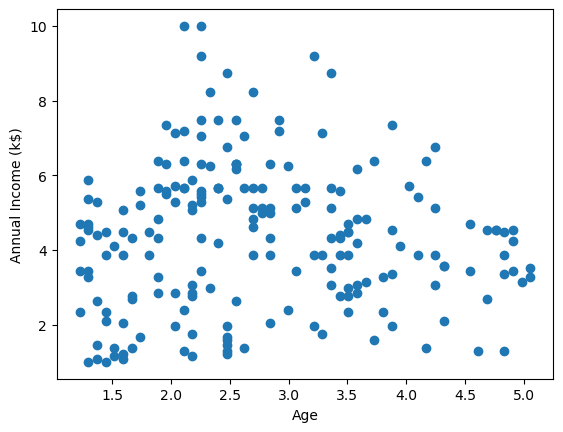

In [3]:
df = pd.DataFrame(customers)

df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df = df.drop('CustomerID', axis = 1)
print(df)
df = np.array(df)
df_norm = (df-df.min())/(df.max()-df.min()) * 9 + 1

df1 = df[:, 1:3]
df1 = np.array(df1)
df1_norm = (df1-df1.min())/(df1.max()-df1.min()) * 9 + 1

plt.scatter(df1_norm[:, 0], df1_norm[:, 1])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [4]:
print(df_norm)

[[ 1.06569343  2.24817518  1.98540146  3.5620438 ]
 [ 1.06569343  2.37956204  1.98540146  6.32116788]
 [ 1.          2.31386861  2.05109489  1.39416058]
 [ 1.          2.51094891  2.05109489  6.05839416]
 [ 1.          3.03649635  2.11678832  3.62773723]
 [ 1.          2.44525547  2.11678832  5.99270073]
 [ 1.          3.29927007  2.18248175  1.39416058]
 [ 1.          2.51094891  2.18248175  7.17518248]
 [ 1.06569343  5.20437956  2.24817518  1.19708029]
 [ 1.          2.97080292  2.24817518  5.72992701]
 [ 1.06569343  5.40145985  2.24817518  1.91970803]
 [ 1.          3.29927007  2.24817518  7.50364964]
 [ 1.          4.81021898  2.31386861  1.98540146]
 [ 1.          2.57664234  2.31386861  6.05839416]
 [ 1.06569343  3.43065693  2.31386861  1.8540146 ]
 [ 1.06569343  2.44525547  2.31386861  6.18978102]
 [ 1.          3.29927007  2.37956204  3.29927007]
 [ 1.06569343  2.31386861  2.37956204  5.33576642]
 [ 1.06569343  4.41605839  2.51094891  2.90510949]
 [ 1.          3.29927007  2.51

In [5]:

class KMeansAlg:
    def __init__(self, k):
        self.k = k
        self.centroids = None
    
    def fit(self, data, max_iterations=100):
        self.centroids = np.random.uniform(np.amin(data, axis=0), np.amax(data, axis=0), size=(self.k, data.shape[1]))
        print(self.centroids)
        
        steps = 0
        
        for _ in range(max_iterations):
            norma = np.zeros((data.shape[0], self.k))
            clusters = []

            for i in range(data.shape[0]):
                for j in range(self.k):
                    norma[i][j] = np.linalg.norm(np.array(data[i]) - np.array(self.centroids[j]))
                
                cluster_num = np.argmin(norma[i])
                clusters.append(cluster_num)
            clusters = np.array(clusters)
            
            cluster_indexes = []
            for i in range(self.k):
                cluster_i_indices = np.argwhere(clusters == i).flatten().tolist()
                cluster_indexes.append(cluster_i_indices)
        
            new_centroids = []
            for i, indexes in enumerate(cluster_indexes):
                if(len(indexes)) == 0:
                    new_centroids.append(self.centroids[i])
                else:
                    new_centroid = []
                    for j in range(data.shape[1]):
                        new_centroid.append(np.mean(data[indexes], axis=0)[j])
                    new_centroids.append(new_centroid)
            new_centroids = np.array(new_centroids)
            
            euqlid = 0
            for j in range(self.k):
                euqlid += np.linalg.norm(new_centroids[0] - np.array(self.centroids[0]))
            print(euqlid)
            
            if euqlid < 0.0001:
                print(self.centroids)
                print(new_centroids)
                print(euqlid)
                break
            else:
                steps += 1
                print(self.centroids)
                print(new_centroids)
                print(euqlid)
                print('-----------------')
                self.centroids = new_centroids
        print(f'Clustering has finished in {steps+1}-th step')   
        return clusters
            
model = KMeansAlg(k=7)
labels = model.fit(df_norm)

[[1.00626564 4.32460145 3.05443259 6.07769568]
 [1.03472457 2.8795937  7.66853926 4.87789649]
 [1.05646641 2.53151444 5.15033382 6.97923647]
 [1.00923549 2.37832919 3.33711263 7.09844431]
 [1.03858779 5.3536804  5.36762474 3.727812  ]
 [1.01783242 5.43448206 4.82653486 2.67212819]
 [1.01190293 5.15101179 3.3409387  7.47558177]]
13.420107012112846
[[1.00626564 4.32460145 3.05443259 6.07769568]
 [1.03472457 2.8795937  7.66853926 4.87789649]
 [1.05646641 2.53151444 5.15033382 6.97923647]
 [1.00923549 2.37832919 3.33711263 7.09844431]
 [1.03858779 5.3536804  5.36762474 3.727812  ]
 [1.01783242 5.43448206 4.82653486 2.67212819]
 [1.01190293 5.15101179 3.3409387  7.47558177]]
[[1.01970803 3.2959854  3.27627737 4.47518248]
 [1.02331057 3.03225806 7.20908877 4.38850954]
 [1.03195897 2.97435392 5.70329454 5.97849674]
 [1.02766039 2.55243949 2.74951978 6.26238955]
 [1.02919708 4.41849148 4.9622871  4.01459854]
 [1.03537339 3.93262212 4.49859629 1.97529478]
 [1.01190293 5.15101179 3.3409387  7.47

In [6]:
model = KMeansAlg(k=5)
labels = model.fit(df1_norm)

[[2.07735111 6.93289936]
 [2.98540779 4.84380457]
 [1.81358559 1.78612718]
 [4.82123112 9.67675616]
 [1.88375471 6.23020613]]
4.0791599582226175
[[2.07735111 6.93289936]
 [2.98540779 4.84380457]
 [1.81358559 1.78612718]
 [4.82123112 9.67675616]
 [1.88375471 6.23020613]]
[[2.64754098 7.51639344]
 [3.27377049 4.41229508]
 [2.36944858 2.0461997 ]
 [2.73360656 9.48360656]
 [2.07078987 5.73695976]]
4.0791599582226175
-----------------
1.6834487211918747
[[2.64754098 7.51639344]
 [3.27377049 4.41229508]
 [2.36944858 2.0461997 ]
 [2.73360656 9.48360656]
 [2.07078987 5.73695976]]
[[2.82377049 7.2295082 ]
 [3.63226528 4.18219076]
 [2.36738876 2.07098946]
 [2.61065574 9.31147541]
 [2.0942623  5.44808743]]
1.6834487211918747
-----------------
1.193922345767801
[[2.82377049 7.2295082 ]
 [3.63226528 4.18219076]
 [2.36738876 2.07098946]
 [2.61065574 9.31147541]
 [2.0942623  5.44808743]]
[[2.82889344 6.99077869]
 [3.93663304 3.98628625]
 [2.34530551 2.05692996]
 [2.61065574 9.31147541]
 [2.13700234 5

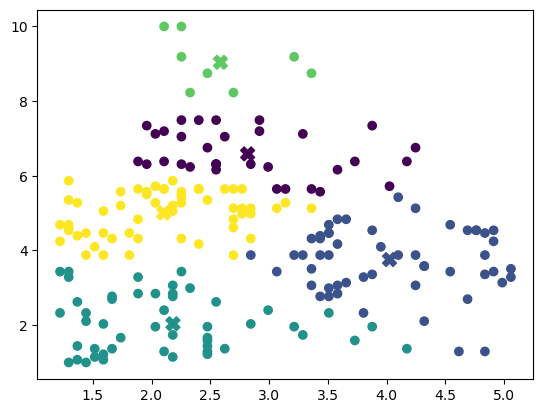

In [7]:
plt.scatter(df1_norm[:, 0], df1_norm[:, 1], c = labels)
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], c=range(len(model.centroids)), marker = 'X', s=100)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


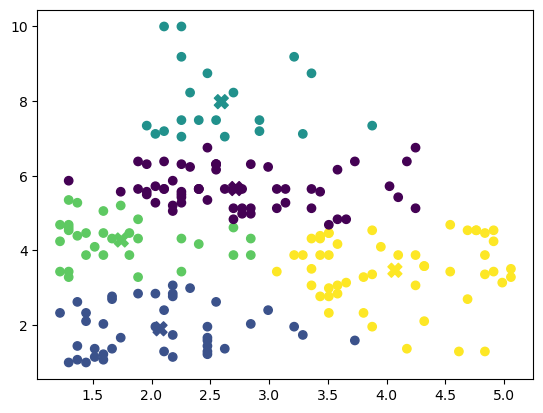

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

kmeans.fit(df1_norm)

sk_labels = kmeans.labels_
sk_centroids = kmeans.cluster_centers_

plt.scatter(df1_norm[:, 0], df1_norm[:, 1], c=sk_labels, cmap='viridis')
plt.scatter(sk_centroids[:, 0], sk_centroids[:, 1], marker='X', s=100, c=range(len(sk_centroids)), label='Centroids')
plt.show()